# HBAT-200 Data Analysis: Predicting Customer Satisfaction

## Introduction

Customer satisfaction is a critical metric for businesses aiming to improve service quality, retain clients, and drive long-term growth. In this analysis, we use the **HBAT-200 dataset**—a widely used dataset in marketing and business analytics—to build a **linear regression model** that identifies key drivers of customer satisfaction (X19).

The dataset includes various performance metrics across product quality, service, pricing, delivery, and customer behavior. However, to ensure model interpretability and avoid complications from categorical variables, we **exclude all binary and categorical predictors** (e.g., `X1` Customer Type, `X2` Industry Type, etc.) and focus only on **continuous or ordinal numerical variables**.

Our goal is to develop a **statistically significant, well-fitting, and interpretable regression model** that explains customer satisfaction and provides actionable business insights.

## Objective

The primary objectives of this analysis are:

1. **Model Development**
   - Perform an initial full regression to assess overall model performance.
   - Apply **stepwise and backward selection** to identify the most significant predictors.
   - Compare models using key metrics: **Adjusted R², AIC, BIC, F-statistic, and p-values**.

2. **Assumption Verification**
   - Test for:
     - Linearity
     - Normality of residuals (Shapiro-Wilk, Q-Q plot)
     - Homoscedasticity (Breusch-Pagan test)
     - Multicollinearity (VIF)
   - Address violations where possible.

3. **Interpretation**
   - Interpret the final regression equation.
   - Analyze the impact of each predictor on satisfaction.
   - Visualize relationships using correlation heatmap, residual plots, and pair plots.

4. **Recommendations**
   - Translate statistical findings into **actionable business strategies**.
   - Prioritize areas for improvement (e.g., technical support, salesforce image, price flexibility).

By the end of this analysis, we aim to deliver a **robust, interpretable model** that not only predicts satisfaction accurately but also guides strategic decision-making at HBAT.

ID<BR>
X1 - Customer Type<BR>
X2 - Industry Type<BR>
X3 - Firm Size<BR>
X4 - Region<BR>
X5 - Distribution System<BR>
X6 - Product Quality<BR>
X7 - E-Commerce<BR>
X8 - Technical Support<BR>
X9 - Complaint Resolution<BR>
X10 - Advertising<BR>
X11 - Product Line<BR>
X12 - Salesforce Image<BR>
X13 - Competitive Pricing<BR>
X14 - Warranty & Claims<BR>
X15 - New Products<BR>
X16 - Order & Billing<BR>
X17 - Price Flexibility<BR>
X18 - Delivery Speed<BR>
X19 - Satisfaction<BR>
X20 - Likely to Recommend<BR>
X21 - Likely to Purchase<BR>
X22 - Purchase Level<BR>
X23 - Consider Strategic Alliance<BR>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('HBAT-200-Data.csv')
df

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1,2,0,1,1,1,8.5,3.9,2.5,5.9,...,4.7,4.3,5.0,5.1,3.7,8.2,8.0,8.4,65.1,1
1,2,3,1,0,0,0,8.2,2.7,5.1,7.2,...,5.5,4.0,3.9,4.3,4.9,5.7,6.5,7.5,67.1,0
2,3,3,0,1,1,1,9.2,3.4,5.6,5.6,...,6.2,4.6,5.4,4.0,4.5,8.9,8.4,9.0,72.1,1
3,4,1,1,1,1,0,6.4,3.3,7.0,3.7,...,7.0,3.6,4.3,4.1,3.0,4.8,6.0,7.2,40.1,0
4,5,2,0,1,0,1,9.0,3.4,5.2,4.6,...,6.1,4.5,4.5,3.5,3.5,7.1,6.6,9.0,57.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,3,1,1,0,0,7.6,3.6,2.1,5.2,...,4.3,6.8,4.4,3.9,4.0,8.2,6.9,8.4,58.1,1
196,197,2,1,1,1,0,5.9,4.0,3.3,7.8,...,5.2,6.6,6.0,7.5,5.4,7.9,7.8,8.6,62.1,1
197,198,3,1,1,1,1,9.7,5.0,7.9,6.3,...,6.6,5.2,4.4,3.5,4.2,8.6,8.8,7.9,66.1,1
198,199,2,1,1,1,1,5.5,5.5,6.9,6.6,...,7.0,5.3,5.9,6.7,4.9,8.2,7.1,7.6,59.1,1


In [ ]:
df.isna().sum()

,0
ID,0
X1,0
X2,0
X3,0
X4,0
X5,0
X6,0
X7,0
X8,0
X9,0


In [ ]:
df.columns

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23'],
      dtype='object')

In [ ]:
# intial model summary

import statsmodels.api as sm

X=df.drop('X19', axis=1)
y=df['X19']

X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    X19   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     57.19
Date:                Sat, 21 Jun 2025   Prob (F-statistic):           2.46e-69
Time:                        04:15:44   Log-Likelihood:                -112.79
No. Observations:                 200   AIC:                             273.6
Df Residuals:                     176   BIC:                             352.7
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9395      0.791     -1.187      0.2

1. Key Metrics:<BR>

* R² = 0.882: 88.2% of satisfaction variance explained<BR>

* Adj. R² = 0.867: Strong explanatory power<BR>

* F-statistic = 57.19 (p < 0.001 extremely small): Model is statistically significant<BR>

* Predictors X1,X9,X12,X20,X21,X23 has p < 0.01: Statistically significant .import statsmodels.api as sm


In [ ]:
# elimintaing categorical and buinary columns

import statsmodels.api as sm

X=df[['X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12','X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X20', 'X21', 'X22']]
y=df['X19']

X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    X19   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     67.89
Date:                Sat, 21 Jun 2025   Prob (F-statistic):           5.35e-68
Time:                        04:15:44   Log-Likelihood:                -132.82
No. Observations:                 200   AIC:                             299.6
Df Residuals:                     183   BIC:                             355.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1305      0.699     -4.480      0.0

In [ ]:
# stepwise selection

X=df[['X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12','X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X20', 'X21', 'X22','X19']]

def stepwise_selection(data, response_col, threshold=0.05):
    X = data.drop(response_col, axis=1)
    y = data[response_col]
    selected_vars = []

    while True:
        remaining_vars = list(set(X.columns) - set(selected_vars))

        # Forward step
        p_values_forward = []
        for var in remaining_vars:
            model = sm.OLS(y, sm.add_constant(X[selected_vars + [var]])).fit()
            p_values_forward.append((var, model.pvalues[var]))

        best_forward_var, min_p_value_forward = min(p_values_forward, key=lambda x: x[1], default=(None, np.inf))

        # Backward step
        if min_p_value_forward < threshold:
            selected_vars.append(best_forward_var)
        else:
            break

    return selected_vars

# Specify the response column
response_column = 'X19'

# Perform stepwise selection with threshold
selected_variables_stepwise = stepwise_selection(X, response_column, threshold=0.05)

# Print the selected variables
print("Selected Variables (Stepwise with Threshold):", selected_variables_stepwise)

Selected Variables (Stepwise with Threshold): ['X20', 'X22', 'X21', 'X12', 'X11', 'X6', 'X18', 'X7']


In [ ]:
# stepwise selected model
X=df[['X20', 'X22', 'X21', 'X12', 'X11', 'X6', 'X18', 'X7']]
y=df['X19']

X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    X19   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     131.5
Date:                Sat, 21 Jun 2025   Prob (F-statistic):           1.90e-73
Time:                        04:15:44   Log-Likelihood:                -139.16
No. Observations:                 200   AIC:                             296.3
Df Residuals:                     191   BIC:                             326.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6338      0.347     -7.592      0.0

In [ ]:
# barckward selection
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.linear_model import LinearRegression

X=df[['X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12','X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X20', 'X21', 'X22']]
y=df['X19']

model=LinearRegression()
sfs=SequentialFeatureSelector(model, n_features_to_select='auto', direction = 'backward')
sfs.fit(X,y)

selected_features=X.columns[sfs.get_support()]
print(selected_features)

Index(['X6', 'X7', 'X11', 'X12', 'X13', 'X17', 'X20', 'X21'], dtype='object')


In [ ]:
X=df[['X6', 'X7', 'X11', 'X12', 'X13', 'X16', 'X17', 'X20', 'X21']]
y=df['X19']

X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    X19   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     120.1
Date:                Sat, 21 Jun 2025   Prob (F-statistic):           1.76e-73
Time:                        04:15:45   Log-Likelihood:                -136.46
No. Observations:                 200   AIC:                             292.9
Df Residuals:                     190   BIC:                             325.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8785      0.452     -6.363      0.0

###  Model Comparison: Stepwise vs. Backward

Stepwise Model is better than backward because:

Higher adjusted R-squared and lower AIC/BIC.

No blatantly insignificant predictors (unlike X22 in Model 1).

Lower condition number, suggesting better numerical stability.

Similar residual diagnostics but slightly better jarque-bera results.

1. Key Metrics:<BR>

* R² = 0.85: 85.0% of satisfaction variance explained<BR>

* Adj. R² = 0.843: Strong explanatory power<BR>

* F-statistic = 120.1 (p < 0.001): Model is significant<BR>

* All predictors p < 0.01: Statistically significant except X13 and X16<BR><BR>




### Model Comparison: Original (16 predictors) vs. Selected (8 predictors)

| Metric  | Original Model (16 predictors)               | Selected Model (8 predictors) |Preferred | Interpretation                                                                                                                                                                |
| --------- | --------------------------- | ----------- | ------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |                                                             
| R-squared |	0.856	| 0.846	| Original (slightly) |
|Adj. R-squared	|0.843	|0.840|	Original (tiny edge)|
|F-statistic(p-value)	|67.89 (5.35e-68)	|131.5 (1.90e-73)	|Selected (stronger)|
|AIC	|299.6	|296.3	|Selected (lower = better)|
|BIC	|355.7|	326.0	|Selected (much lower)|
|Significant predictors	|6/16 (p < 0.05)	|7/8 (p < 0.05, except X22)|	Selected (fewer useless vars)|
|Condition Number	|1.36e+03 (severe multicollinearity)|	607 (moderate multicollinearity)|	Selected (less collinearity)|
Overfitting Risk|	High (many insignificant terms)	|Lower (only X22 is clearly useless)	|Selected

In [ ]:
X=df[['X6', 'X7', 'X11', 'X12', 'X17', 'X20', 'X21']]
y=df['X19']

X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    X19   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     151.2
Date:                Sat, 21 Jun 2025   Prob (F-statistic):           1.42e-74
Time:                        04:15:45   Log-Likelihood:                -139.11
No. Observations:                 200   AIC:                             294.2
Df Residuals:                     192   BIC:                             320.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3626      0.392     -8.586      0.0

In [ ]:

def get_prediction_equation(model, features):
    """
    Creates a prediction equation string from an OLS model and feature names.

    Args:
        model (statsmodels.regression.linear_model.RegressionResultsWrapper): The fitted OLS model.
        features (list): A list of the names of the independent variables.

    Returns:
        str: The prediction equation string.
    """
    intercept = model.params['const']
    equation = f"X19 = {intercept:.4f}"
    for feature in features:
      # skip const
        if feature == 'const':
            continue
        coefficient = model.params[feature]
        equation += f" + {coefficient:.4f} * {feature}"
    return equation

prediction_equation = get_prediction_equation(model, X.columns.tolist())
print("Prediction Equation:")
prediction_equation

Prediction Equation:


'X19 = -3.3626 + 0.2800 * X6 + -0.2352 * X7 + 0.3559 * X11 + 0.4496 * X12 + 0.2314 * X17 + 0.2446 * X20 + 0.2384 * X21'

#### Equation :   <BR>
X19 = -3.3626 + 0.2800 * X6 + -0.2352 * X7 + 0.3559 * X11 + 0.4496 * X12 + 0.2314 * X17 + 0.2446 * X20 + 0.2384 * X21

Jarque-Bera (p=0.212) → No normality issues.

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = het_breuschpagan(model.resid, X)
print(dict(zip(names, test)))

{'Lagrange multiplier statistic': np.float64(12.805207858972768), 'p-value': np.float64(0.0769991120144726), 'f-value': np.float64(1.876273129184775), 'f p-value': np.float64(0.07538927300670661)}


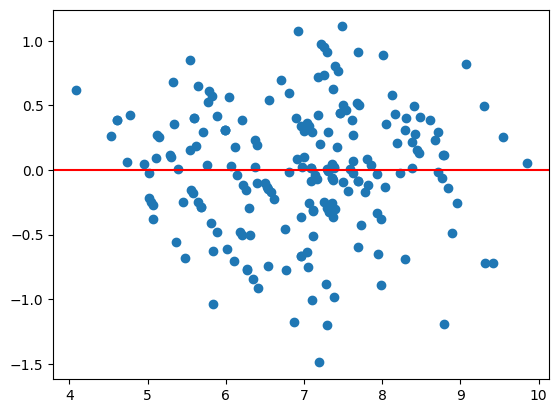

In [ ]:
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(0, color='red')

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = het_breuschpagan(model.resid, X)
print(dict(zip(names, test)))

{'Lagrange multiplier statistic': np.float64(12.805207858972768), 'p-value': np.float64(0.0769991120144726), 'f-value': np.float64(1.876273129184775), 'f p-value': np.float64(0.07538927300670661)}


In [ ]:
df_plot=pd.concat([X,y],axis=1)
df_plot

,const,X6,X7,X11,X12,X17,X20,X21,X19
0,1.0,8.5,3.9,4.9,6.0,5.1,8.0,8.4,8.2
1,1.0,8.2,2.7,7.9,3.1,4.3,6.5,7.5,5.7
2,1.0,9.2,3.4,7.4,5.8,4.0,8.4,9.0,8.9
3,1.0,6.4,3.3,4.7,4.5,4.1,6.0,7.2,4.8
4,1.0,9.0,3.4,6.0,4.5,3.5,6.6,9.0,7.1
...,...,...,...,...,...,...,...,...,...
195,1.0,7.6,3.6,6.6,5.4,3.9,6.9,8.4,8.2
196,1.0,5.9,4.0,5.9,6.2,7.5,7.8,8.6,7.9
197,1.0,9.7,5.0,7.6,6.1,3.5,8.8,7.9,8.6
198,1.0,5.5,5.5,5.7,8.2,6.7,7.1,7.6,8.2


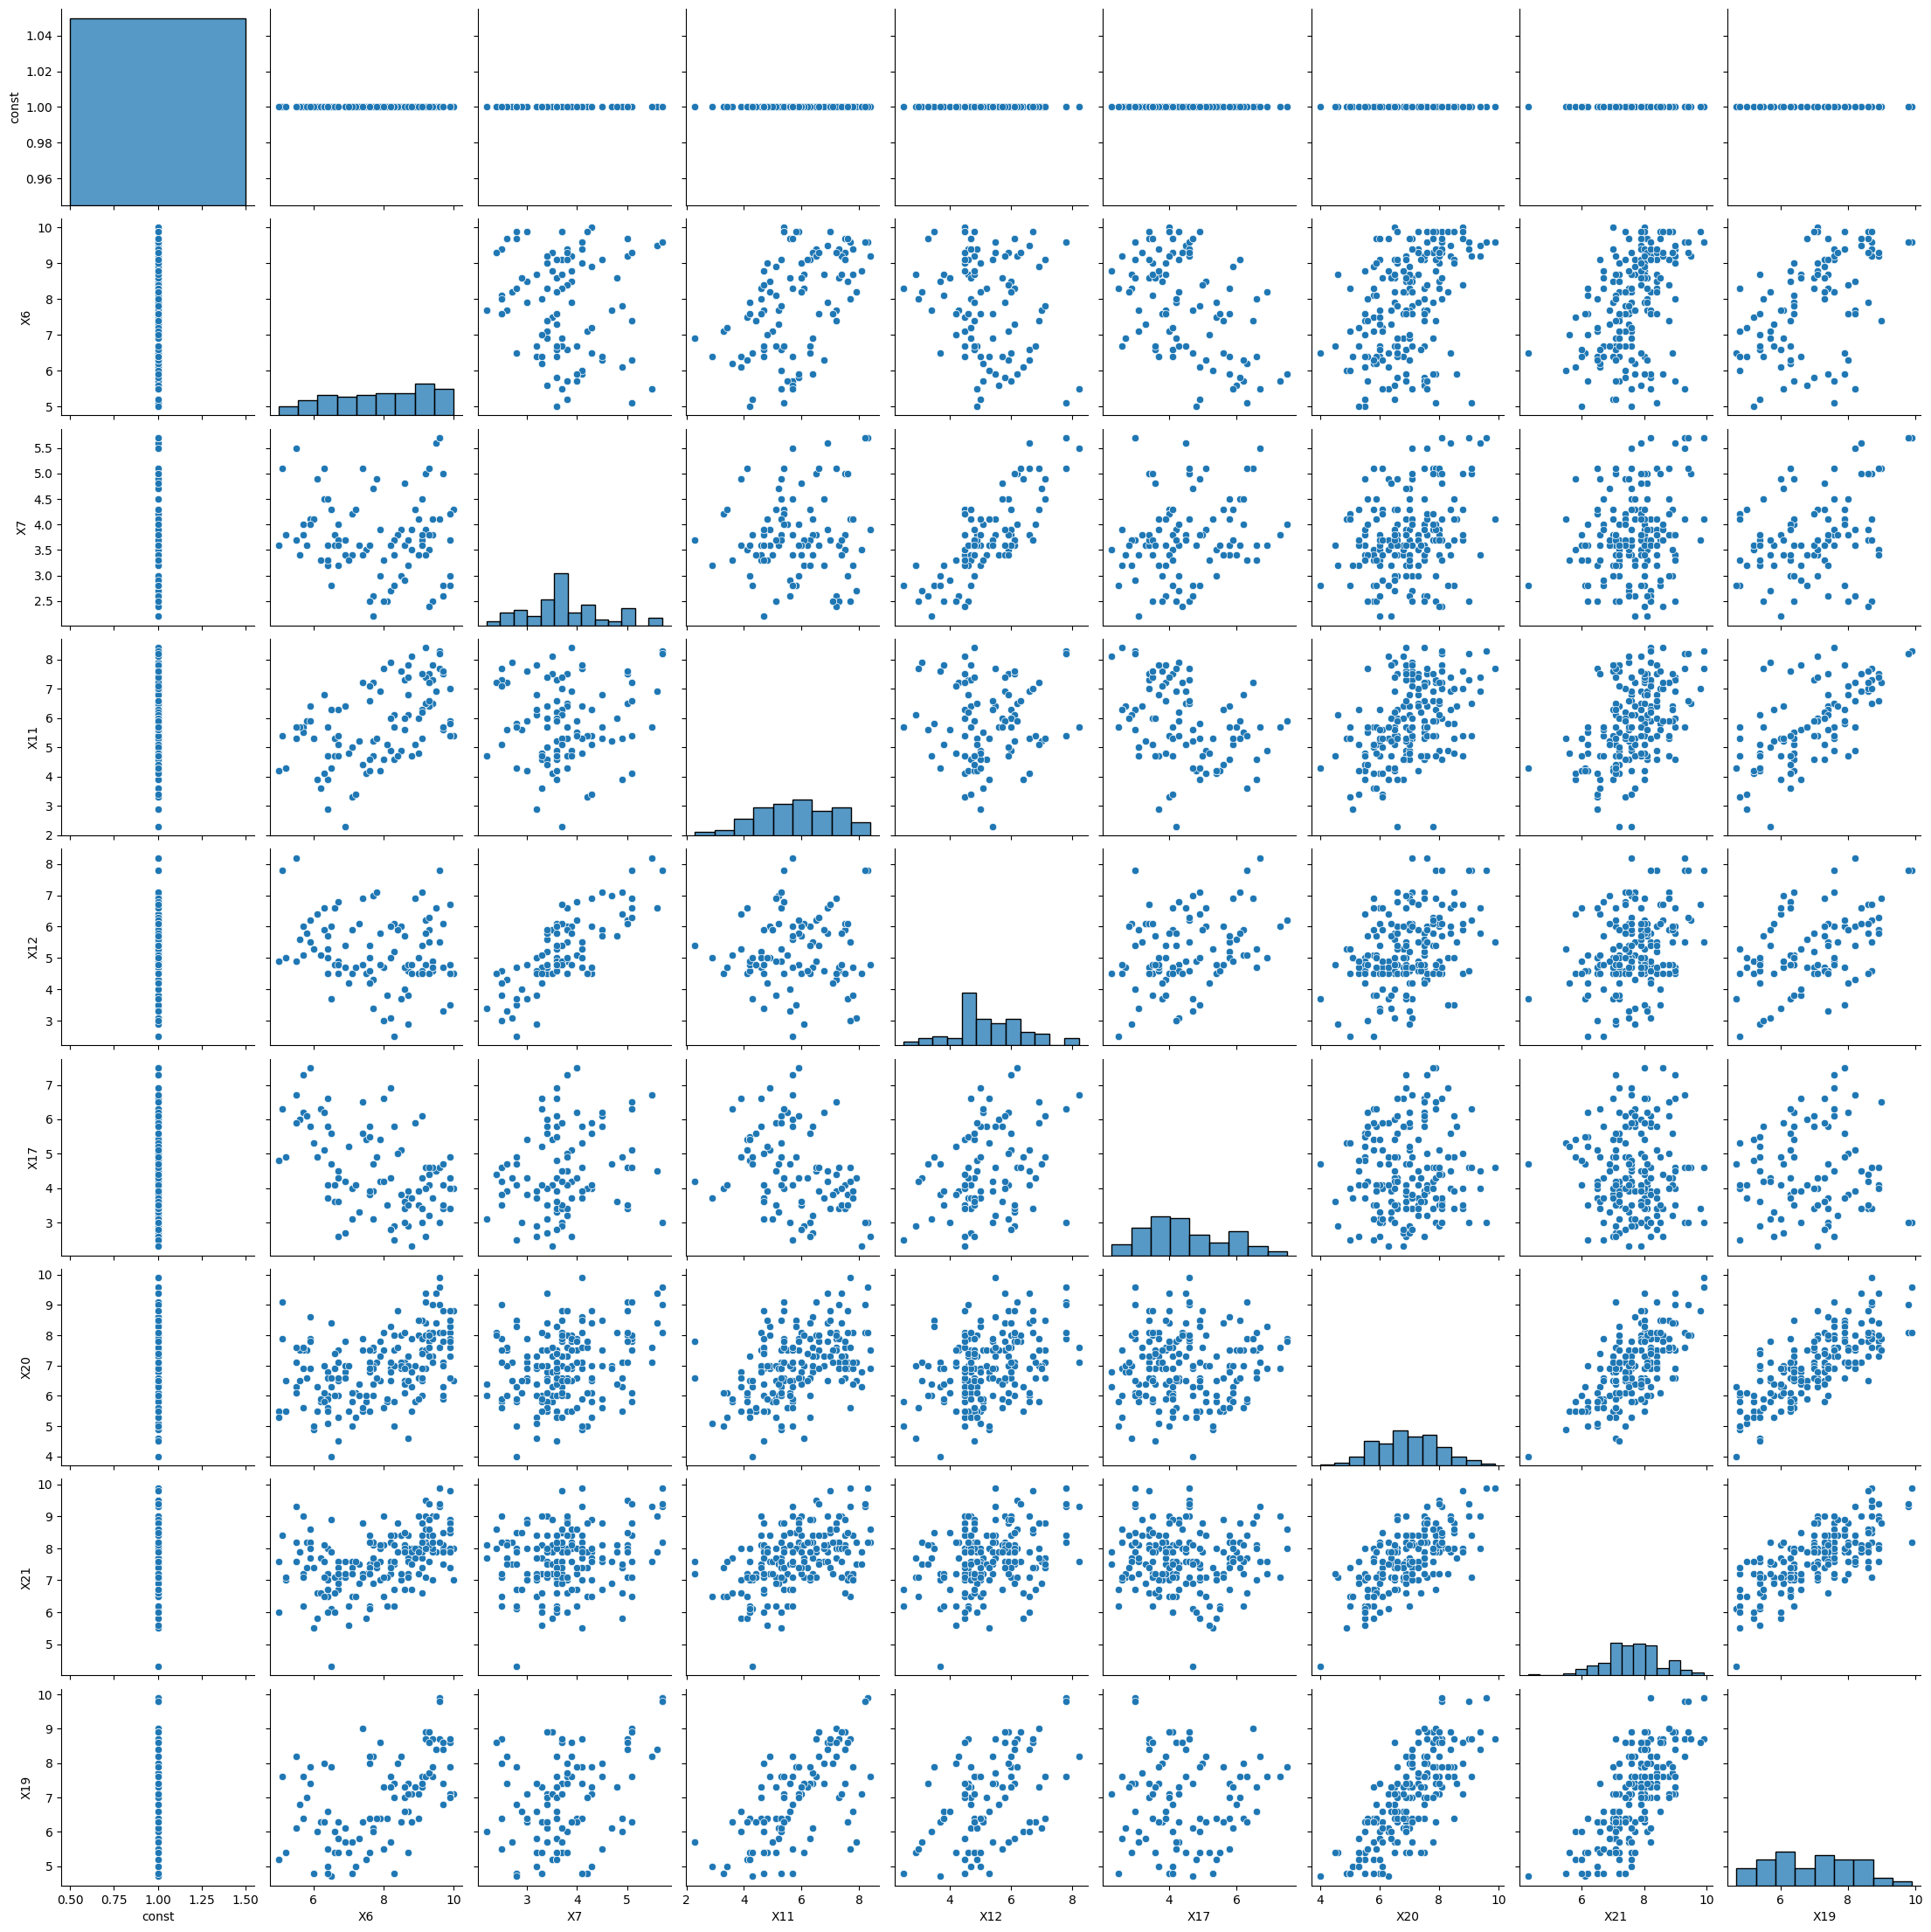

In [ ]:
# scatter of all columns vs X19
import seaborn as sns
sns.pairplot(df_plot)
plt.show()

In [ ]:
# normality shapiro
from scipy.stats import shapiro
shapiro(model.resid)

ShapiroResult(statistic=np.float64(0.9906214787681522), pvalue=np.float64(0.21983192266831936))

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,feature,VIF
0,const,125.147586
1,X6,2.140569
2,X7,2.712413
3,X11,1.683120
4,X12,3.285978
5,X17,1.625269
6,X20,2.285036
7,X21,2.072718


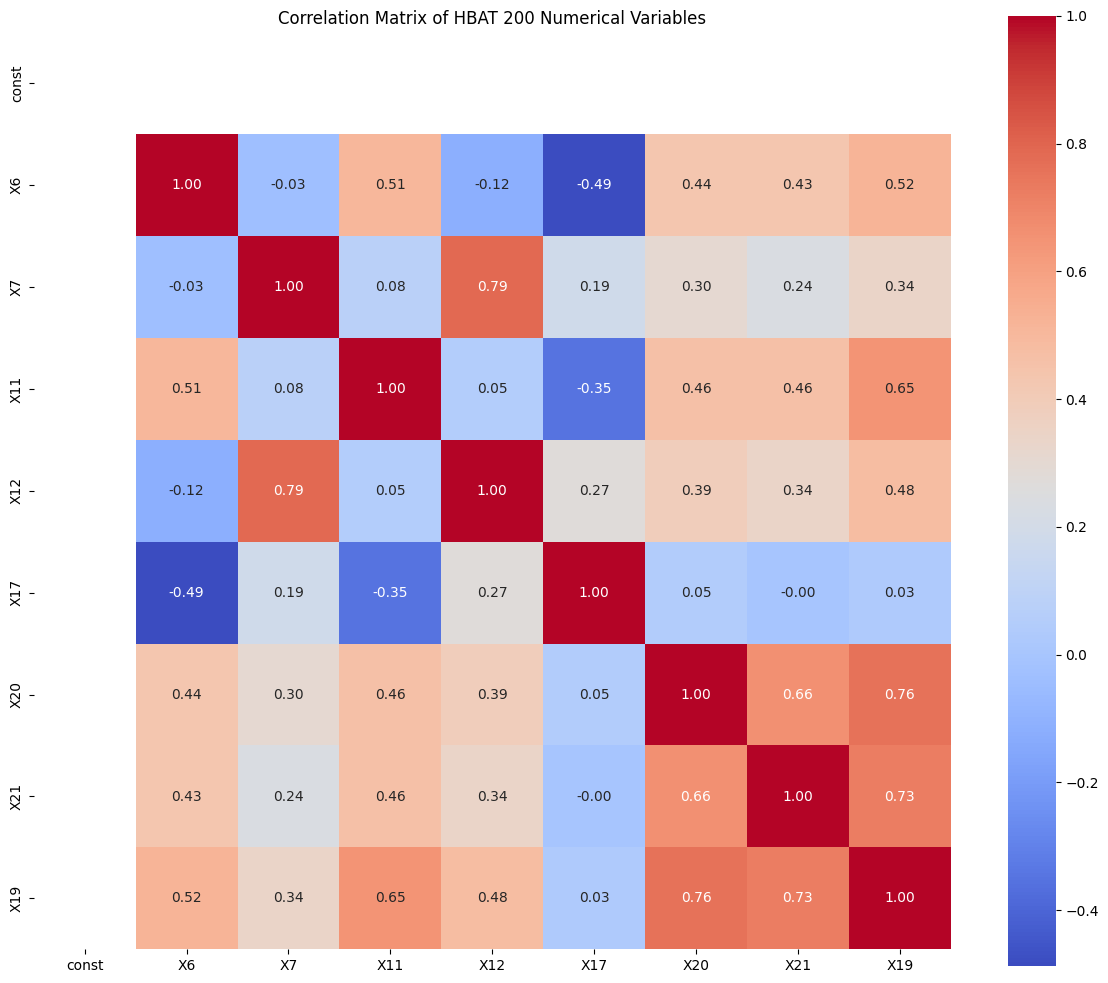

In [ ]:
corr_matrix = df_plot.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of HBAT 200 Numerical Variables')
plt.tight_layout()
plt.show()

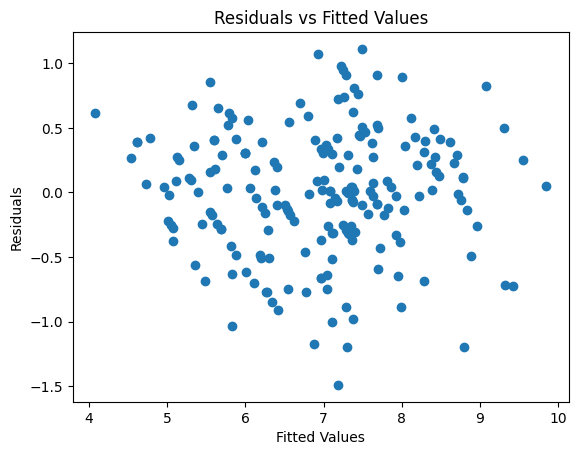

In [ ]:
# residuals vs fitted
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

<Axes: ylabel='Count'>

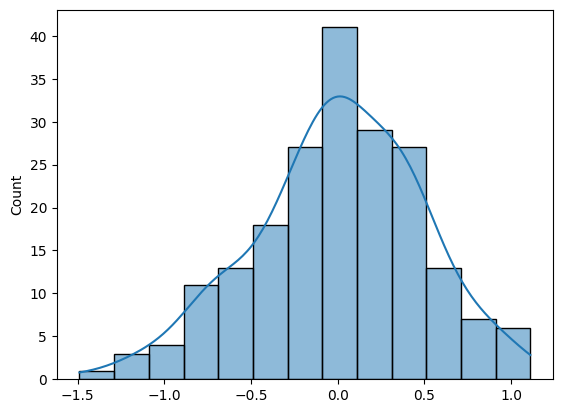

In [ ]:
import seaborn as sns
sns.histplot(model.resid, kde=True)

There is statistically significant evidence of heteroskedasticity in the model

In [ ]:
# shapiro robust_model
shapiro(model.resid)

ShapiroResult(statistic=np.float64(0.9906214787681522), pvalue=np.float64(0.21983192266831936))

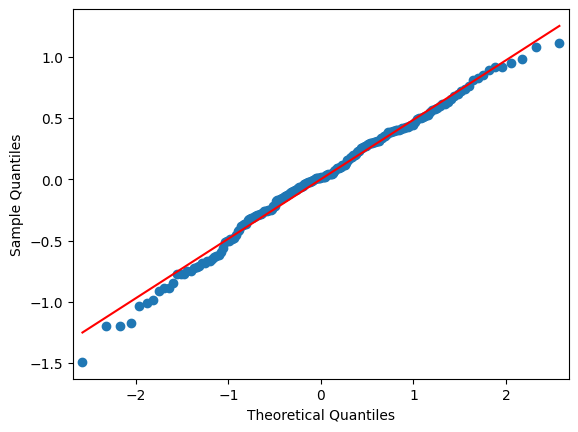

In [ ]:
# qq plot
import statsmodels.api as sm
sm.qqplot(model.resid, line='s')
plt.show()

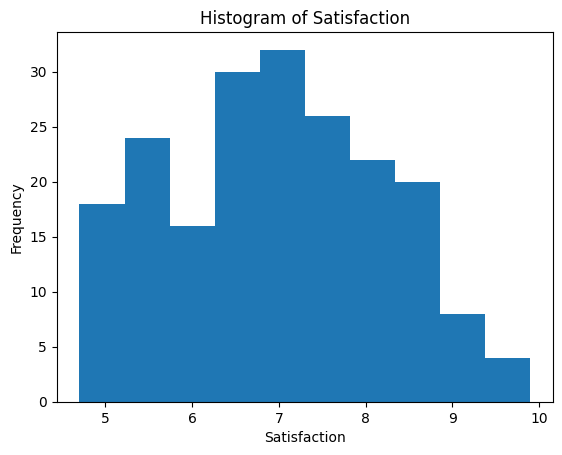

In [ ]:
# x19 hist
plt.hist(df['X19'], bins=10)
plt.xlabel('Satisfaction')
plt.ylabel('Frequency')
plt.title('Histogram of Satisfaction')
plt.show()